In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [2]:
data = np.loadtxt(open("./mnist_train_small.csv", "rb"), delimiter=",")


# don't need labels
data = data[:,1:]

# normalize data
dataNorm = data / np.max(data)

# convert to tensor
dataT = torch.tensor(dataNorm).float()

### Create Model

In [3]:
def createNet():
    
    class Net(nn.Module):
        
        def __init__(self):
            super().__init__()
            
            ### input layer
            self.input = nn.Linear(784, 250)
            
            ### encoder layer
            self.enc = nn.Linear(250, 50)
            
            ### latent layer
            self.lat = nn.Linear(50, 250)
            
            ### decoder layer
            self.dec = nn.Linear(250, 784)
            
        def forward(self, x):
            x = F.relu(self.input(x))
            
            x = F.relu(self.enc(x))
            x = F.relu(self.lat(x))
            y = torch.sigmoid(self.dec(x))
            
            return y
        
    net = Net()
    
    # loss function
    lossFn = nn.MSELoss()
    
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    
    return net, lossFn, optimizer     

In [4]:
net, lossFn, optimizer = createNet()

X = dataT[:5,:]
yHat = net(X)

print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


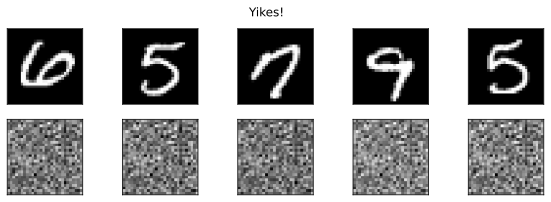

In [5]:
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
    axs[0,i].imshow(X[i,:].view(28,28).detach(), cmap='gray')
    axs[1,i].imshow(yHat[i,:].view(28,28).detach(), cmap='gray')
    axs[0,i].set_xticks([]), axs[0,i].set_yticks([]) 
    axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
    
plt.suptitle("Yikes!")
plt.show()


In [6]:
def function2trainTheModel():

  # number of epochs
  numepochs = 10000
  
  # create a new model
  net,lossfun,optimizer = createNet()

  # initialize losses
  losses = torch.zeros(numepochs)


  # loop over epochs
  for epochi in range(numepochs):

    # select a random set of images
    randomidx = np.random.choice(dataT.shape[0],size=32)
    X = dataT[randomidx,:]

    # forward pass and loss
    ### normally second parameter is yHat but in this case it's not.
    yHat = net(X)
    loss = lossfun(yHat,X)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # losses in this epoch
    losses[epochi] = loss.item()
  # end epochs

  # function output
  return losses,net

Final loss: 0.0064


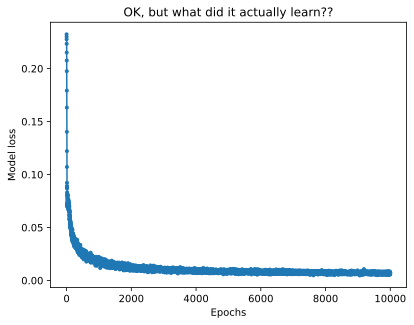

In [7]:
# train the model (90s)
losses,net = function2trainTheModel()
print(f'Final loss: {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('OK, but what did it actually learn??')
plt.show()

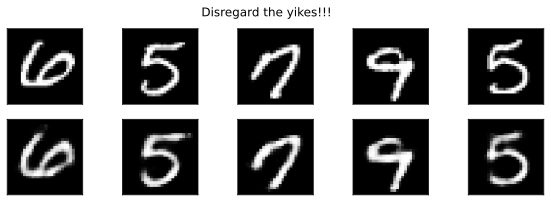

In [8]:
# Repeat the visualization when testing the model
X = dataT[:5,:]
yHat = net(X)


# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('Disregard the yikes!!!')
plt.show()

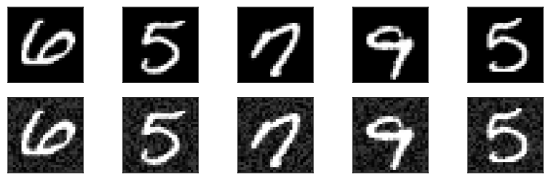

In [9]:
# grab a small set of images
X = dataT[:10,:]

# add noise
Xnoise = X + torch.rand_like(X)/4

# clip at 1
Xnoise[Xnoise>1] = 1


# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.show()

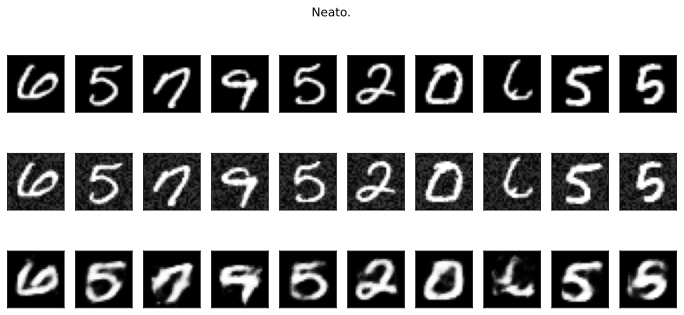

In [10]:
# run through the model
Y = net(Xnoise)


# show the noisy images
fig,axs = plt.subplots(3,10,figsize=(12,5))

for i in range(10):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])
  
plt.suptitle('Neato.')
plt.show()